# Baseline comparison for anomaly detection with Isolation Forest

In [5]:
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
# Load the sample set
y_set = np.load('anomaly_paper_y_set.npy')
test_set = np.load('anomaly_paper_test_traj_set.npy')

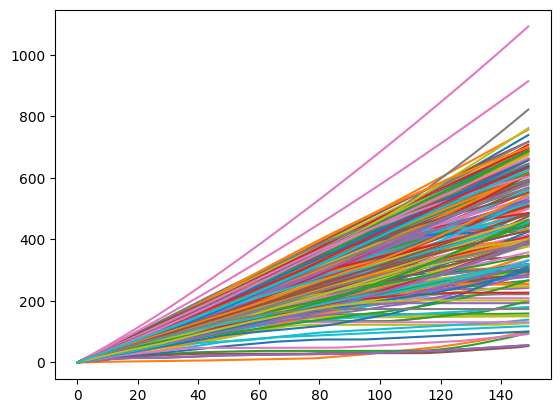

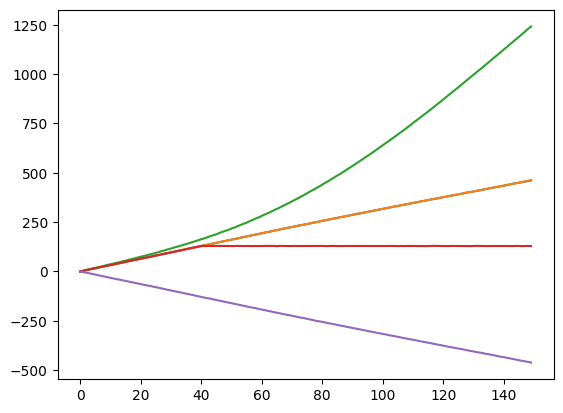

In [8]:
for i in range(y_set.shape[0]):
    plt.plot(y_set[i,:])
plt.figure()
for i in range(test_set.shape[0]):
    plt.plot(test_set[i,:])

In [16]:
from sklearn.ensemble import IsolationForest

scores = []

for t in range(1,100):
    clf = IsolationForest(max_samples=50, random_state=0)
    clf.fit(y_set[:,:t]) # up to 50 timesteps
    s = clf.score_samples(test_set[:,:t])
    scores.append(s)
    del clf 



In [17]:
scores = np.array(scores)

In [21]:
test_legend = ['Mean', 'Normal', 'Speeding', 'Stopped', 'Opposite direction']

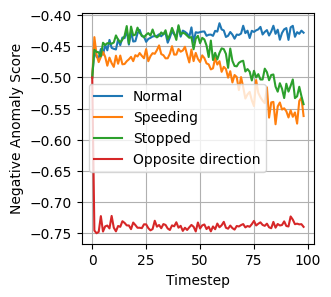

In [29]:
plt.figure(figsize=(3,3))

for i in range(1,scores.shape[1]):
    plt.plot(scores[:,i], label=test_legend[i])

plt.legend()
plt.xlabel('Timestep')
plt.ylabel('Negative Anomaly Score')
plt.grid()

plt.savefig('isolated_forest.pdf', bbox_inches = 'tight')